날씨와 전력수요량 데이터 분석

In [2]:
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
power_mean_mon = pd.read_csv('data2\power_mean_mon.csv',encoding='cp949')
weather_mean_mon = pd.read_csv('data2\weather_mean_mon.csv',encoding='cp949')

In [4]:
power_mean_mon.head(2)

,year,month,현재수요(MW)
0,2012,6,55649.90712
1,2012,7,58375.80796


In [5]:
weather_mean_mon.head(2)

,year,month,기온(°C),풍속(m/s),습도(%)
0,2012,6,21.821471,2.039055,71.769715
1,2012,7,25.225634,1.957829,80.756319


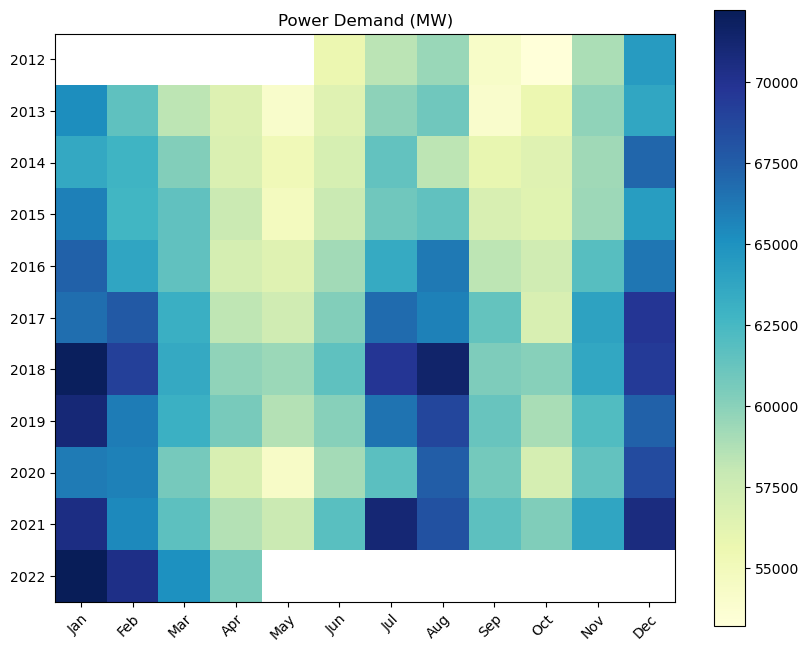

In [6]:
# 전력 수요량을 12년도부터 22년도까지의 데이터를 월별로 히트맵으로 표시


heat_12 = pd.read_csv('data\power_demand_mean_month_2012.csv', encoding='cp949')
heat_13 = pd.read_csv('data\power_demand_mean_month_2013.csv', encoding='cp949')
heat_14 = pd.read_csv('data\power_demand_mean_month_2014.csv', encoding='cp949')
heat_15 = pd.read_csv('data\power_demand_mean_month_2015.csv', encoding='cp949')
heat_16 = pd.read_csv('data\power_demand_mean_month_2016.csv', encoding='cp949')
heat_17 = pd.read_csv('data\power_demand_mean_month_2017.csv', encoding='cp949')
heat_18 = pd.read_csv('data\power_demand_mean_month_2018.csv', encoding='cp949')
heat_19 = pd.read_csv('data\power_demand_mean_month_2019.csv', encoding='cp949')
heat_20 = pd.read_csv('data\power_demand_mean_month_2020.csv', encoding='cp949')
heat_21 = pd.read_csv('data\power_demand_mean_month_2021.csv', encoding='cp949')
heat_22 = pd.read_csv('data\power_demand_mean_month_2022.csv', encoding='cp949')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 8]

df =  pd.concat([heat_12, heat_13,heat_14, heat_15,heat_16, heat_17,heat_18, heat_19, heat_20, heat_21, heat_22]).reset_index(drop=True)


data = df.pivot(index='year', columns='month', values='현재수요(MW)').to_numpy()

# Define the x-axis tick labels (months)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Define the y-axis tick labels (years)
years = df['year'].unique()
fig, ax = plt.subplots()
im = ax.imshow(data, cmap='YlGnBu')

ax.set_xticks(np.arange(len(months)))
ax.set_yticks(np.arange(len(years)))
ax.set_xticklabels(months)
ax.set_yticklabels(years)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Add the data values as annotations to the heatmap
# for i in range(len(years)):
#     for j in range(len(months)):
#         text = ax.text(j, i, data[i, j], ha="center", va="center", color="w")

# Add a colorbar to the heatmap
cbar = ax.figure.colorbar(im, ax=ax)

# Set the title of the plot
ax.set_title("Power Demand (MW)")

# Show the plot
plt.show()


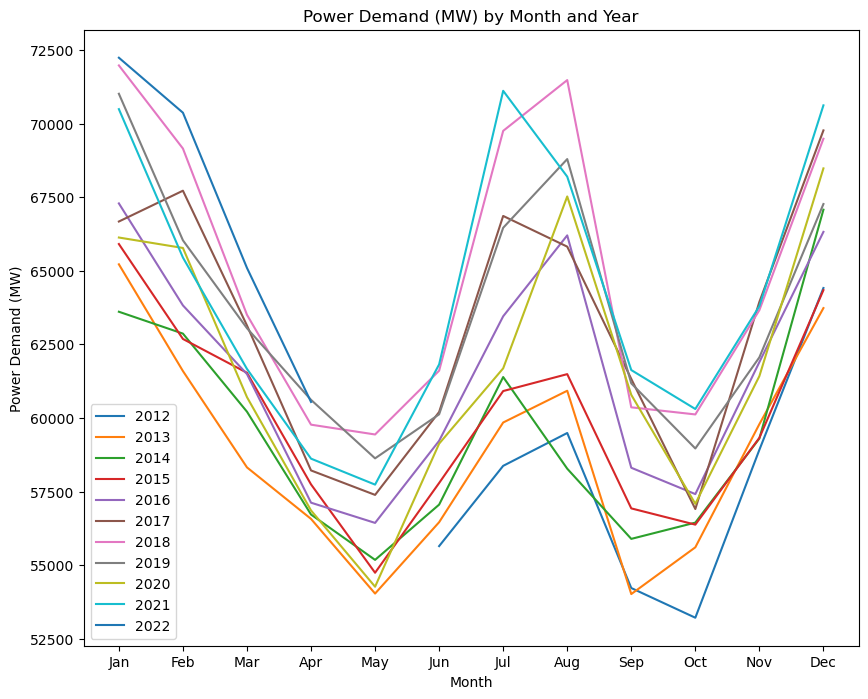

In [11]:
# 전력 수요량을 12년도부터 22년도까지의 데이터를 년도별로 꺾은선그래프로 표시


heat_12 = pd.read_csv('data\power_demand_mean_month_2012.csv', encoding='cp949')
heat_13 = pd.read_csv('data\power_demand_mean_month_2013.csv', encoding='cp949')
heat_14 = pd.read_csv('data\power_demand_mean_month_2014.csv', encoding='cp949')
heat_15 = pd.read_csv('data\power_demand_mean_month_2015.csv', encoding='cp949')
heat_16 = pd.read_csv('data\power_demand_mean_month_2016.csv', encoding='cp949')
heat_17 = pd.read_csv('data\power_demand_mean_month_2017.csv', encoding='cp949')
heat_18 = pd.read_csv('data\power_demand_mean_month_2018.csv', encoding='cp949')
heat_19 = pd.read_csv('data\power_demand_mean_month_2019.csv', encoding='cp949')
heat_20 = pd.read_csv('data\power_demand_mean_month_2020.csv', encoding='cp949')
heat_21 = pd.read_csv('data\power_demand_mean_month_2021.csv', encoding='cp949')
heat_22 = pd.read_csv('data\power_demand_mean_month_2022.csv', encoding='cp949')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 8]

df =  pd.concat([heat_12, heat_13,heat_14, heat_15,heat_16, heat_17,heat_18, heat_19, heat_20, heat_21, heat_22]).reset_index(drop=True)


# Define the colors for the line plot
# colors = ['blue', 'orange', 'green', 'red', 'black','gray', 'pink','yellow', 'sky', 'purple']

# Create a line plot for each year
for i, year in enumerate(df['year'].unique()):
    year_data = df[df['year'] == year]
    plt.plot(year_data['month'], year_data['현재수요(MW)'], label=str(year))

# Set the x-axis and y-axis labels
plt.xlabel('Month')
plt.ylabel('Power Demand (MW)')

# Set the x-axis tick labels (months)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(1, 13), months)

# Add a legend to the plot
plt.legend()

# Set the title of the plot
plt.title('Power Demand (MW) by Month and Year')

# Show the plot
plt.show()

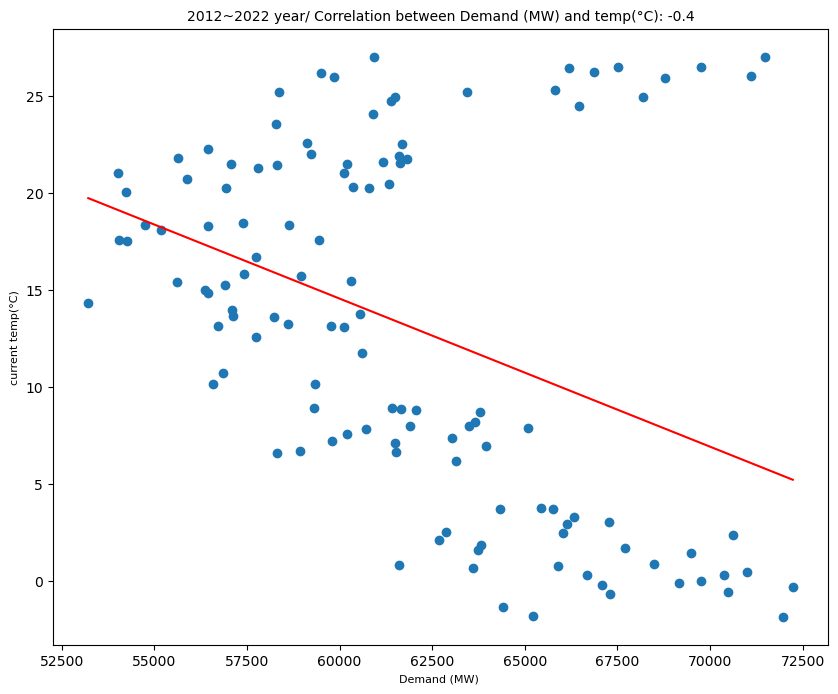

In [7]:
# 기온과 전력수요량의 상관계수 그래프 12~22년
# 점은 월 평균을, 선은 상관계수를 나타냄

correlation = power_mean_mon['현재수요(MW)'].corr(weather_mean_mon['기온(°C)'])

plt.scatter(power_mean_mon['현재수요(MW)'], weather_mean_mon['기온(°C)'])

# Draw the correlation coefficient line
plt.plot(np.unique(power_mean_mon['현재수요(MW)']), np.poly1d(np.polyfit(power_mean_mon['현재수요(MW)'], weather_mean_mon['기온(°C)'], 1))(np.unique(power_mean_mon['현재수요(MW)'])), color='red')


plt.xlabel('Demand (MW) ', fontsize=8)
plt.ylabel('current temp(°C)', fontsize=8)
# plt.title('correlation(상관계수): '+str(np.round(correlation,2)), fontsize = 15)
plt.title('2012~2022 year/ Correlation between Demand (MW) and temp(°C): '+str(np.round(correlation,2)),fontsize=10)
plt.show()

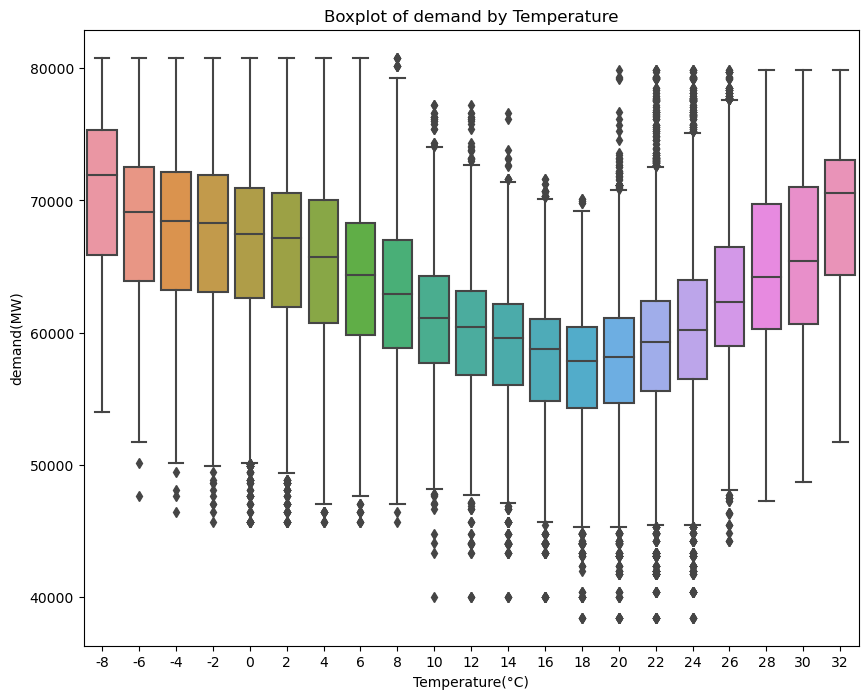

In [15]:
# 기온에 따른 전력 수요량 박스플롯 12~22년
# 일단위로 표시, 기온를 2°C단위로 끊어서 표현


heat_18 = pd.read_csv('data2\power_demand_mean_day_data.csv', encoding='cp949')

weather = pd.read_csv('data2\일별_전국_평균날씨.csv', encoding='cp949')


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 8]

df_heat = pd.concat([heat_18]).reset_index(drop=True)
df_weather = pd.concat([weather]).reset_index(drop=True)

df_trans = []

for i, item in enumerate(df_weather['기온(°C)']):
    item = int(item / 2) * 2
    df_trans.append(item)

df_weather['기온'] = df_trans

# df_weather.head(2)

df_merged = pd.merge(df_heat, df_weather, on=['year', 'month'])
df_merged.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y'], inplace=True)
df_merged.rename(columns={'power generation': '현재수요(MW)', 'current temp(°C)': '기온'}, inplace=True)


sns.boxplot(x=df_merged['기온'], y=df_merged['현재수요(MW)'])

# Add axis labels and title
plt.xlabel('Temperature(°C)')
plt.ylabel('demand(MW)')
plt.title(f'Boxplot of demand by Temperature')

plt.show()

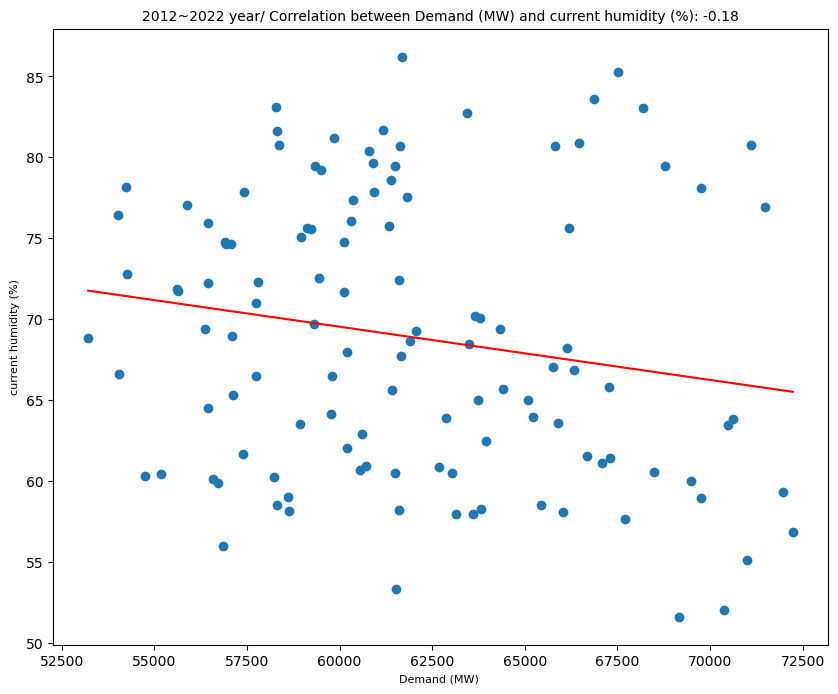

In [16]:
# 습도와 전력수요량의 상관계수 그래프 12~22년
# 점은 월 평균을, 선은 상관계수를 나타냄

correlation = power_mean_mon['현재수요(MW)'].corr(weather_mean_mon['습도(%)'])

plt.scatter(power_mean_mon['현재수요(MW)'], weather_mean_mon['습도(%)'])

# Draw the correlation coefficient line
plt.plot(np.unique(power_mean_mon['현재수요(MW)']), np.poly1d(np.polyfit(power_mean_mon['현재수요(MW)'], weather_mean_mon['습도(%)'], 1))(np.unique(power_mean_mon['현재수요(MW)'])), color='red')


plt.xlabel('Demand (MW) ', fontsize=8)
plt.ylabel('current humidity (%)', fontsize=8)
# plt.title('correlation(상관계수): '+str(np.round(correlation,2)), fontsize = 15)
plt.title('2012~2022 year/ Correlation between Demand (MW) and current humidity (%): '+str(np.round(correlation,2)),fontsize=10)
plt.show()

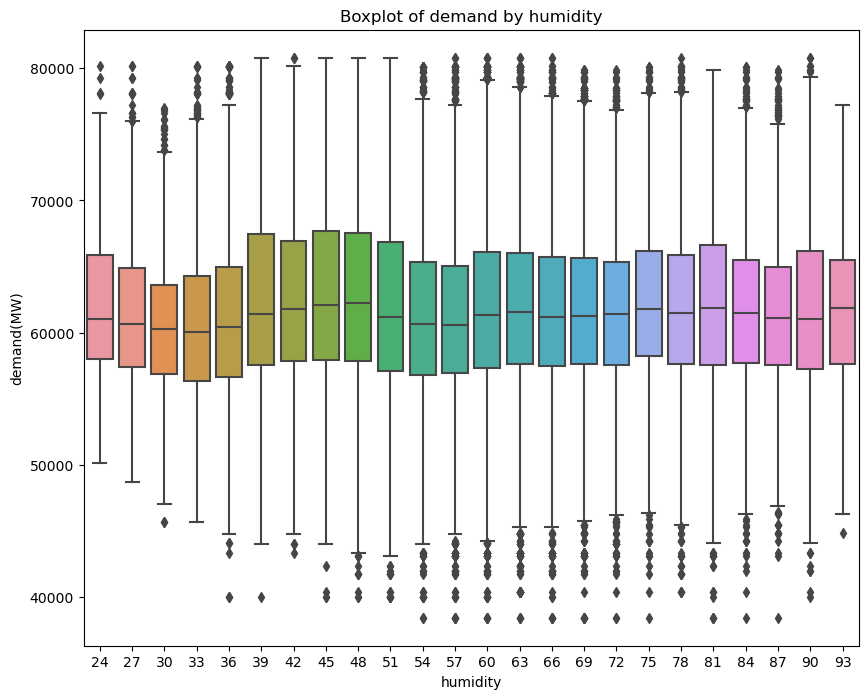

In [13]:
# 습도에 따른 전력 수요량 박스플롯 12~22년
# 일단위로 표시, 습도를 3%단위로 끊어서 표현

heat_18 = pd.read_csv('data2\power_demand_mean_day_data.csv', encoding='cp949')

weather = pd.read_csv('data2\일별_전국_평균날씨.csv', encoding='cp949')


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 8]

df_heat = pd.concat([heat_18]).reset_index(drop=True)
df_weather = pd.concat([weather]).reset_index(drop=True)

df_trans = []

for i, item in enumerate(df_weather['습도(%)']):
    item = int(item / 3) * 3
    df_trans.append(item)

df_weather['습도'] = df_trans

# df_weather.head(2)

df_merged = pd.merge(df_heat, df_weather, on=['year', 'month'])
df_merged.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y'], inplace=True)
df_merged.rename(columns={'power generation': '현재수요(MW)', 'current temp(°C)': '습도'}, inplace=True)


sns.boxplot(x=df_merged['습도'], y=df_merged['현재수요(MW)'])

# Add axis labels and title
plt.xlabel('humidity')
plt.ylabel('demand(MW)')
plt.title(f'Boxplot of demand by humidity')

plt.show()

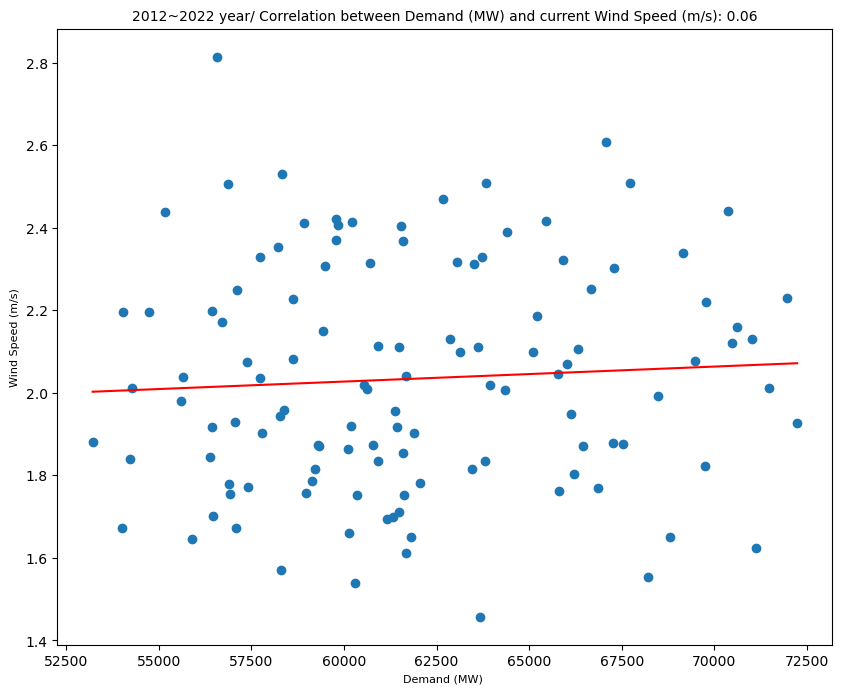

In [9]:
correlation = power_mean_mon['현재수요(MW)'].corr(weather_mean_mon['풍속(m/s)'])

plt.scatter(power_mean_mon['현재수요(MW)'], weather_mean_mon['풍속(m/s)'])

# Draw the correlation coefficient line
plt.plot(np.unique(power_mean_mon['현재수요(MW)']), np.poly1d(np.polyfit(power_mean_mon['현재수요(MW)'], weather_mean_mon['풍속(m/s)'], 1))(np.unique(power_mean_mon['현재수요(MW)'])), color='red')


plt.xlabel('Demand (MW) ', fontsize=8)
plt.ylabel('Wind Speed (m/s)', fontsize=8)
# plt.title('correlation(상관계수): '+str(np.round(correlation,2)), fontsize = 15)
plt.title('2012~2022 year/ Correlation between Demand (MW) and current Wind Speed (m/s): '+str(np.round(correlation,2)),fontsize=10)
plt.show()

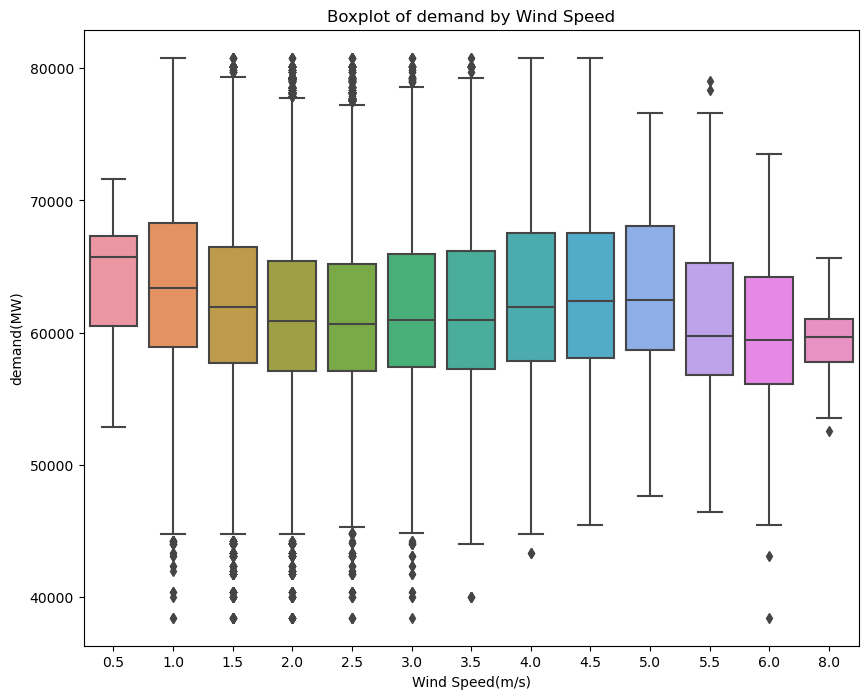

In [18]:
# 풍속에 따른 전력 수요량 박스플롯 12~22년
# 일단위로 표시, 풍속을 0.5(m/s)단위로 끊어서 표현

heat_18 = pd.read_csv('data2\power_demand_mean_day_data.csv', encoding='cp949')

weather = pd.read_csv('data2\일별_전국_평균날씨.csv', encoding='cp949')


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 8]

df_heat = pd.concat([heat_18]).reset_index(drop=True)
df_weather = pd.concat([weather]).reset_index(drop=True)

df_trans = []

for i, item in enumerate(df_weather['풍속(m/s)']):
    item = int(item / 0.5) * 0.5
    df_trans.append(item)

df_weather['풍속'] = df_trans

# df_weather.head(2)

df_merged = pd.merge(df_heat, df_weather, on=['year', 'month'])
df_merged.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y'], inplace=True)
df_merged.rename(columns={'power generation': '발전량', 'current temp(°C)': '풍속'}, inplace=True)


sns.boxplot(x=df_merged['풍속'], y=df_merged['현재수요(MW)'])

# Add axis labels and title
plt.xlabel('Wind Speed(m/s)')
plt.ylabel('demand(MW)')
plt.title(f'Boxplot of demand by Wind Speed')

plt.show()